## 데이터 둘러보기

In [2]:
import pandas as pd
import numpy as np
import os

data_path = '/home/restful3/datasets/kaggle/bike-sharing-demand'

train = pd.read_csv(os.path.join(data_path, 'train.csv'))
test = pd.read_csv(os.path.join(data_path, 'test.csv'))
submission = pd.read_csv(os.path.join(data_path, 'sampleSubmission.csv'))

In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 피처 엔지니어링

In [11]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [51]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['date'] = train.datetime.dt.date
train['day'] = train.datetime.dt.day

In [31]:
train['weekday'] = train.datetime.dt.weekday
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second

In [26]:
season_map = {1:'Sprint', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_map = {1:'Clear', 2:'Mist, Few clouds', 3:'Light Snow, Rain, Thunderstorm', 4:'Heavy Rain, Thunderstorm, Snow, Fog'}

In [27]:
train['season'] = train['season'].map(season_map)
train['weather'] = train['weather'].map(weather_map)

In [52]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,weekday,hour,minute,second,day
0,2011-01-01 00:00:00,Sprint,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,2011-01-01,5,0,0,0,1
1,2011-01-01 01:00:00,Sprint,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,2011-01-01,5,1,0,0,1
2,2011-01-01 02:00:00,Sprint,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,2011-01-01,5,2,0,0,1
3,2011-01-01 03:00:00,Sprint,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011,1,2011-01-01,5,3,0,0,1
4,2011-01-01 04:00:00,Sprint,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011,1,2011-01-01,5,4,0,0,1


## 데이터 시각화

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

### 분포도

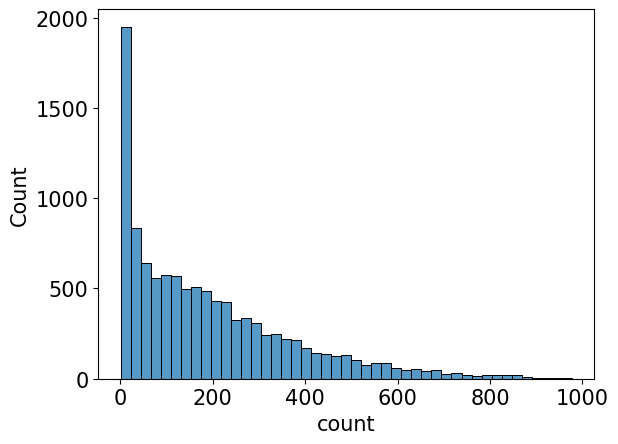

In [38]:
import matplotlib as mpl

mpl.rc('font', size=15)
sns.histplot(train['count']);

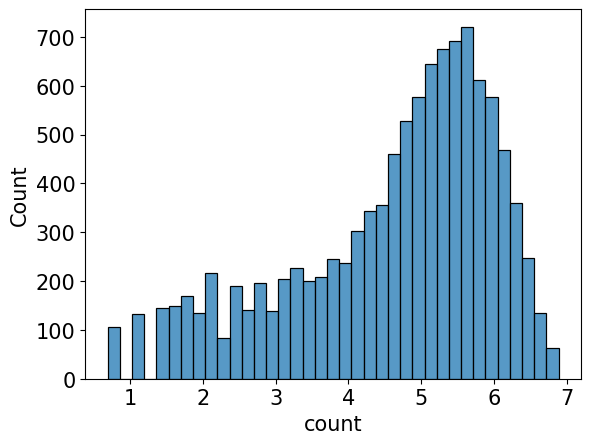

In [39]:
sns.histplot(np.log1p(train['count']));

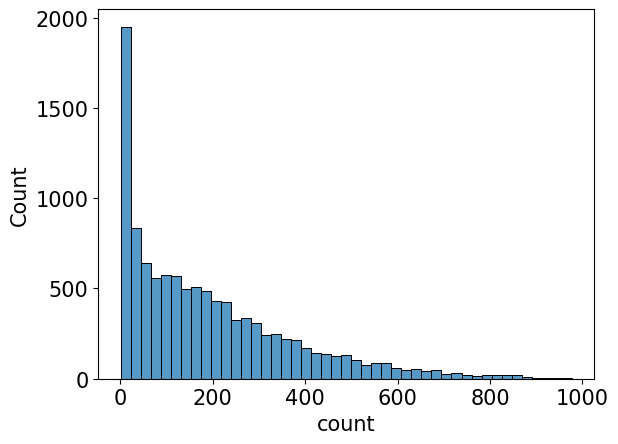

In [41]:
sns.histplot(np.expm1(np.log1p(train['count'])));

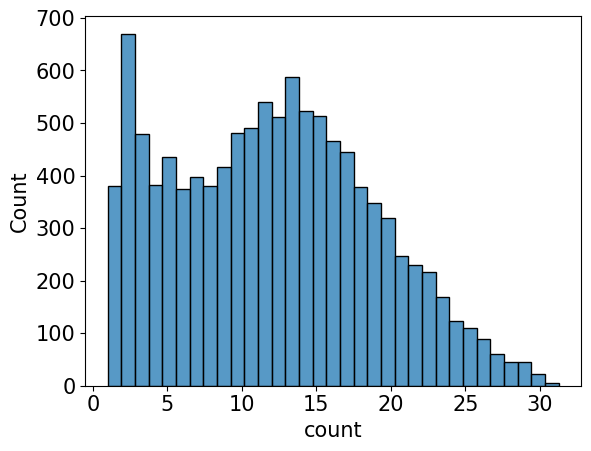

In [42]:
sns.histplot(np.sqrt(train['count']));

### 막대 그래프

In [50]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,weekday,hour,minute,second
0,2011-01-01 00:00:00,Sprint,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011,1,2011-01-01,5,0,0,0
1,2011-01-01 01:00:00,Sprint,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011,1,2011-01-01,5,1,0,0
2,2011-01-01 02:00:00,Sprint,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011,1,2011-01-01,5,2,0,0
3,2011-01-01 03:00:00,Sprint,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011,1,2011-01-01,5,3,0,0
4,2011-01-01 04:00:00,Sprint,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011,1,2011-01-01,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012,12,2012-12-19,2,19,0,0
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012,12,2012-12-19,2,20,0,0
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012,12,2012-12-19,2,21,0,0
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012,12,2012-12-19,2,22,0,0


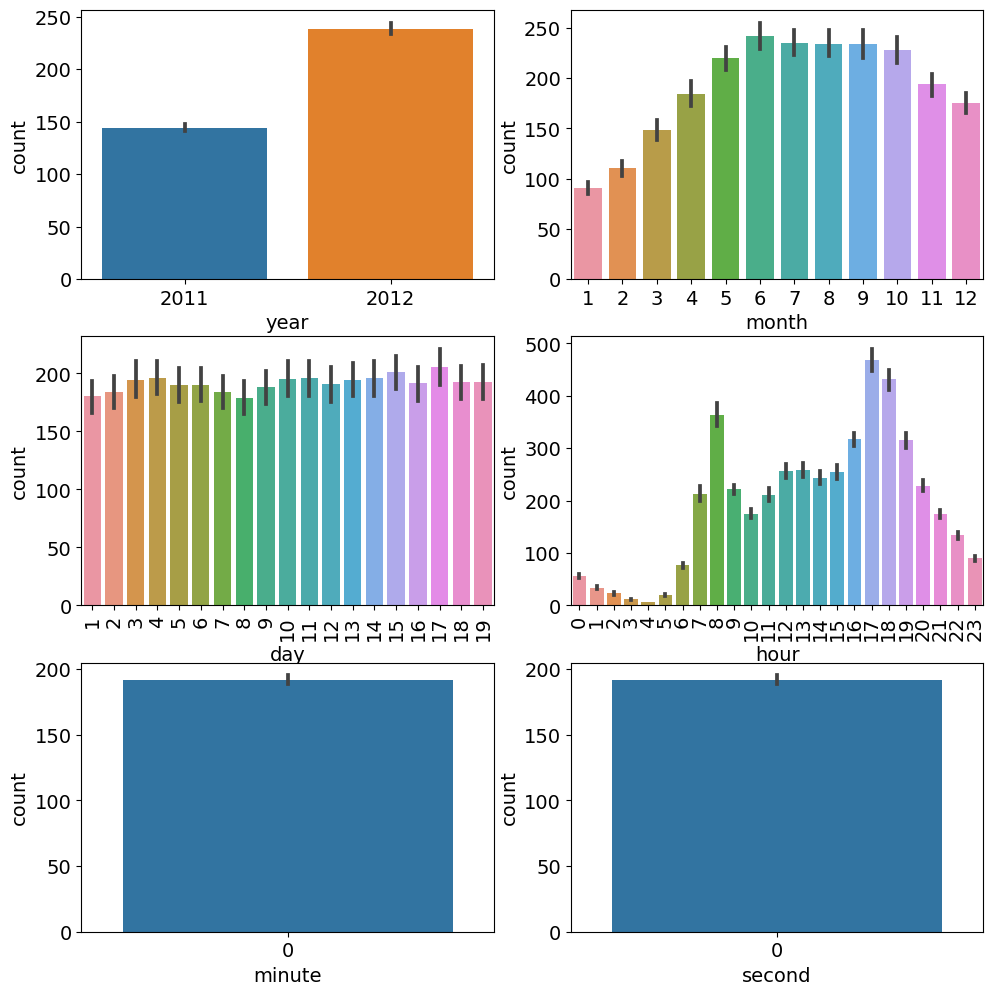

In [56]:
plt.rc('font', size=14)
plt.rc('axes', titlesize=15)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
plt.tight_layout()
sns.barplot(x='year', y='count', data=train, ax=axs[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axs[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axs[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axs[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axs[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axs[2, 1])

axs[1, 0].tick_params(axis='x', labelrotation=90)
axs[1, 1].tick_params(axis='x', labelrotation=90)

### 박스플롯

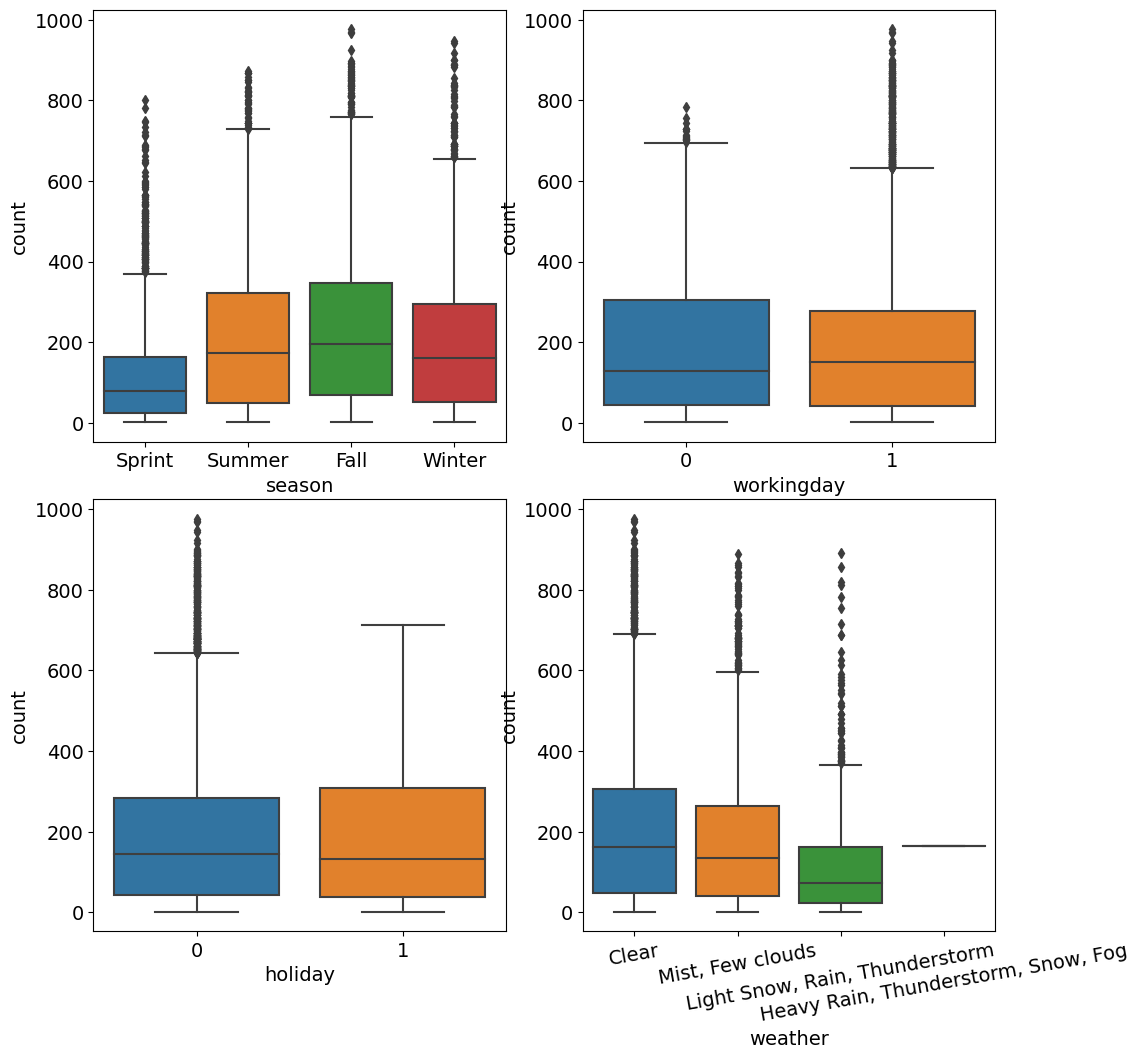

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.tight_layout()

sns.boxplot(x='season', y='count', data=train, ax=axs[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axs[1, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axs[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axs[0, 1])

axs[1, 1].tick_params(axis='x', labelrotation=10)

### 포인트 플롯

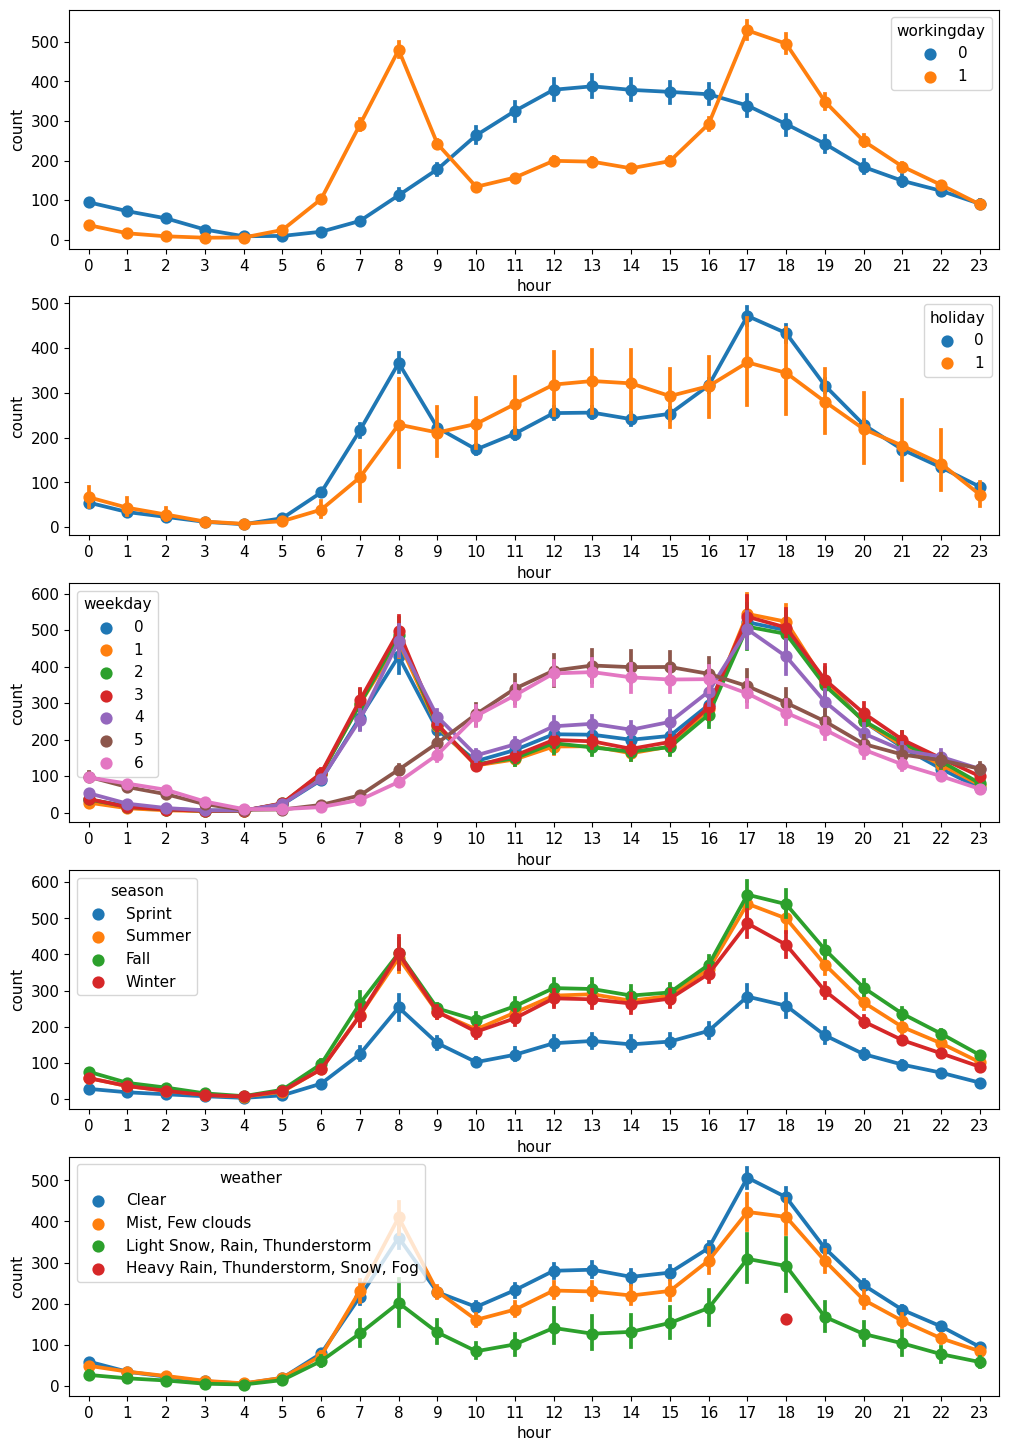

In [61]:
plt.rc('font', size=11)
fig,axs = plt.subplots(nrows=5, figsize=(12, 18))

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axs[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axs[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axs[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axs[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axs[4]);

### 회귀선을 포함한 산점도

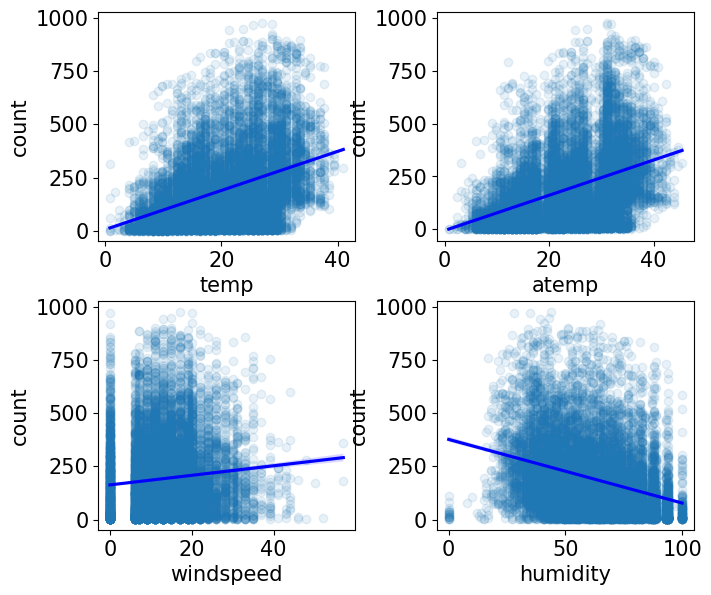

In [69]:
plt.rc('font', size=15)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
plt.tight_layout()

sns.regplot(x='temp', y='count', data=train, ax=axs[0, 0], scatter_kws={'alpha':0.1},line_kws={'color':'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axs[0, 1], scatter_kws={'alpha':0.1},line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axs[1, 0], scatter_kws={'alpha':0.1},line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axs[1, 1], scatter_kws={'alpha':0.1},line_kws={'color':'blue'});

<Axes: xlabel='windspeed', ylabel='Count'>

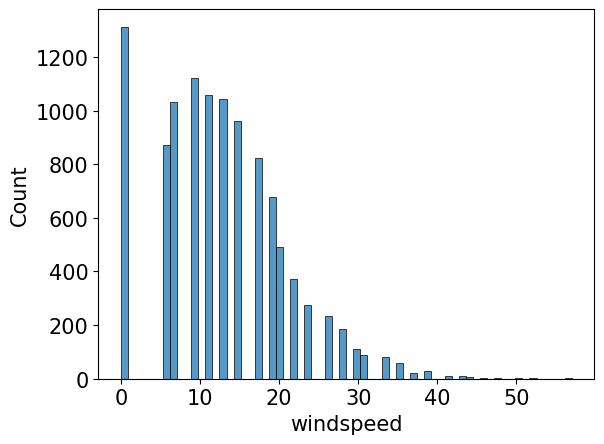

In [72]:
sns.histplot(train['windspeed'])

In [75]:
train['windspeed'].isna().sum()

0

### 히트맵

In [76]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


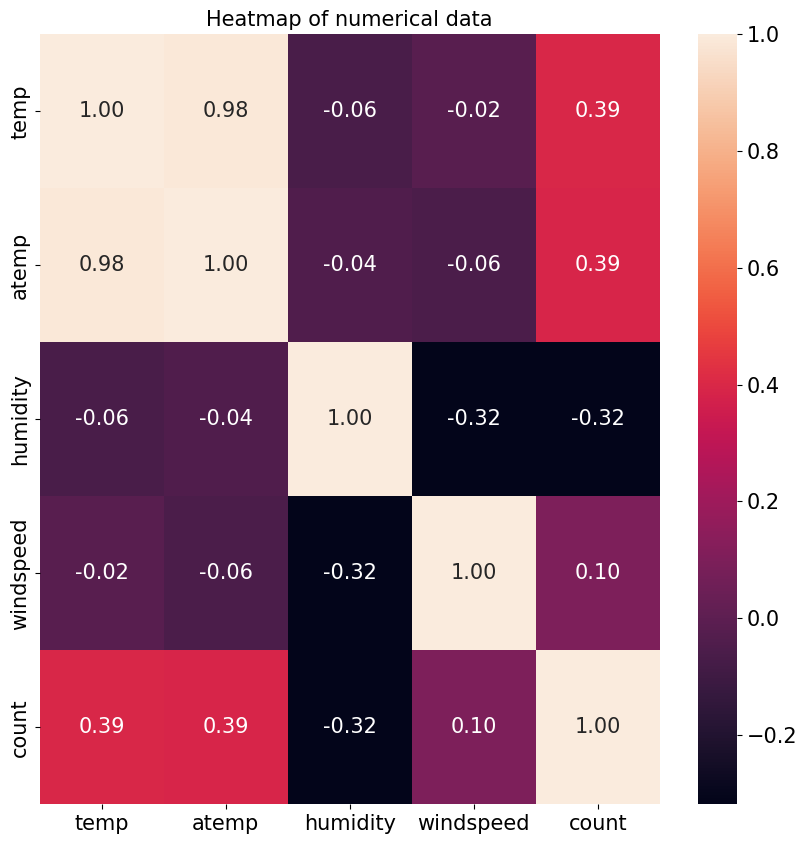

In [80]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrMat, annot=True, fmt='.2f')
plt.title('Heatmap of numerical data')
plt.show()